# Questions:

1- Most influencial users in specific hashtag (#energy)
* filter users with energy hashtag in their hashtags
* calculate index of engagement
* visualise the top users



**Index of engagement = sum(reply+retweet/followers)*100**

2 - Which are the popular devices

3- Define time spread

*** work in progress for text analysis using wordCloud ***

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordCloud import wordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import nltk
nltk.download('punkt')

In [2]:
df = pd.read_csv('twitter_data.csv', sep=',')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(288349, 24)

In [4]:
df.head()

,Unnamed: 0,index,url,created_at,text,_id,links,reply_count,retweet_count,favorite_count,...,source_name,media,collected_via,retweet,user_screen_name,quoted_id,quoted_user_id,mentions_names,mentions_ids,hashtags
0,0,0,https://twitter.com/LeipzigSyd/status/12233949...,2020-01-31 23:57:47+00:00,#Canberra suburbs and hundreds of lives at ris...,1.223395e+18,https://www.theguardian.com/australia-news/liv...,2.0,5.0,6.0,...,Twitter for Android,NaN,scraping,False,LeipzigSyd,NaN,NaN,NaN,NaN,canberra|bushfires|nsw|act|victoria|coal|gas|a...
1,1,1,https://twitter.com/5minofscience/status/12233...,2020-01-31 23:55:45+00:00,Another consequence of climate change: Dozens ...,1.223394e+18,https://www.theweathernetwork.com/ca/news/arti...,0.0,1.0,0.0,...,Twitter for Android,NaN,scraping,False,5minofscience,NaN,NaN,NaN,NaN,climatechange|climate|environment|coronoraviru...
2,2,2,https://twitter.com/Cameron_Diver/status/12233...,2020-01-31 23:49:44+00:00,#Climate breakdown 'is increasing #ViolenceAga...,1.223393e+18,https://www.theguardian.com/environment/2020/j...,0.0,2.0,10.0,...,Twitter for iPhone,NaN,scraping,False,Cameron_Diver,NaN,NaN,NaN,NaN,climate|violenceagainstwomen|vawg|climatechang...
3,3,3,https://twitter.com/PlantBasedNews/status/1223...,2020-01-31 23:48:01+00:00,'If a private plane is really the most cost-ef...,1.223393e+18,https://www.plantbasednews.org/news/environmen...,2.0,5.0,22.0,...,Buffer,NaN,scraping,False,PlantBasedNews,NaN,NaN,NaN,NaN,climate
4,4,4,https://twitter.com/Bec_Carman/status/12233893...,2020-01-31 23:35:35+00:00,@TerrySquibb1 @marketmodel @jimcramer @Sameera...,1.223389e+18,NaN,3.0,0.0,0.0,...,Twitter Web App,[{'previewUrl': 'https://pbs.twimg.com/media/E...,scraping,False,Bec_Carman,NaN,NaN,terrysquibb1|marketmodel|jimcramer|sameerasava...,2924967512|21917683|14216123|557109347,fossilfuels|climate


- we take only the columns we are interested in

In [5]:
filtered = df[['index', 'created_at','text','user_screen_name','reply_count','retweet_count',
'favorite_count', 'quoteCount', 'source_name','hashtags']]

In [6]:
filtered.isna().sum()

index                 0
created_at            0
text                  0
user_screen_name      5
reply_count           5
retweet_count         5
favorite_count        5
quoteCount            5
source_name         233
hashtags              8
dtype: int64

In [7]:
twitter_dataset = filtered.dropna()

In [8]:
twitter_dataset.describe()

,index,reply_count,retweet_count,favorite_count,quoteCount
count,288113.000000,288113.000000,288113.000000,288113.000000,288113.000000
mean,12370.328878,0.370757,3.076789,6.918955,0.281928
std,7539.183496,7.136389,26.758996,69.110650,2.869715
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6005.000000,0.000000,0.000000,0.000000,0.000000
50%,12015.000000,0.000000,0.000000,1.000000,0.000000
75%,18023.000000,0.000000,2.000000,3.000000,0.000000
max,31253.000000,2199.000000,5297.000000,9415.000000,525.000000


In [9]:
twitter_dataset.head()

,index,created_at,text,user_screen_name,reply_count,retweet_count,favorite_count,quoteCount,source_name,hashtags
0,0,2020-01-31 23:57:47+00:00,#Canberra suburbs and hundreds of lives at ris...,LeipzigSyd,2.0,5.0,6.0,0.0,Twitter for Android,canberra|bushfires|nsw|act|victoria|coal|gas|a...
1,1,2020-01-31 23:55:45+00:00,Another consequence of climate change: Dozens ...,5minofscience,0.0,1.0,0.0,0.0,Twitter for Android,climatechange|climate|environment|coronoraviru...
2,2,2020-01-31 23:49:44+00:00,#Climate breakdown 'is increasing #ViolenceAga...,Cameron_Diver,0.0,2.0,10.0,0.0,Twitter for iPhone,climate|violenceagainstwomen|vawg|climatechang...
3,3,2020-01-31 23:48:01+00:00,'If a private plane is really the most cost-ef...,PlantBasedNews,2.0,5.0,22.0,1.0,Buffer,climate
4,4,2020-01-31 23:35:35+00:00,@TerrySquibb1 @marketmodel @jimcramer @Sameera...,Bec_Carman,3.0,0.0,0.0,0.0,Twitter Web App,fossilfuels|climate


- since we have group of hashtags grouped by '|' we devide them to choose interesting hashtags to analyse further

In [10]:
twitter_dataset.groupby(['hashtags'], as_index=False)['retweet_count'].max()

,hashtags,retweet_count
0,0133075281|9780133075281|climate|environment|g...,0.0
1,0133075281|9780133075281|climate|green,0.0
2,039|039|039already|americas|change|climate|glo...,0.0
3,039|039|039into|blue|change|climate|europe|glo...,0.0
4,039|039|039|039|039|climate|globalwarming|clim...,0.0
...,...,...
144635,気候も危機|climatechange|globalwarming|地球温暖化|環境問題|c...,5.0
144636,気候も危機|climate|climateaction|climatecrisis|clim...,3.0
144637,気候危機に特効薬なし|fightclimatejustice|fridaysforfutur...,1.0
144638,𝗪𝗵𝗮𝘁𝗰𝗮𝗻𝗽𝗼𝘀𝘀𝗶𝗯𝗹𝘆𝗴𝗼𝘄𝗿𝗼𝗻𝗴𝗶𝗻𝗳𝗮𝗿𝗺𝗶𝗻𝗴|almosteverythi...,0.0


In [11]:
twitter_dataset['tokenized_text'] = twitter_dataset.hashtags.apply(lambda x : x.split('|', 100))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
twitter_dataset.head()

,index,created_at,text,user_screen_name,reply_count,retweet_count,favorite_count,quoteCount,source_name,hashtags,tokenized_text
0,0,2020-01-31 23:57:47+00:00,#Canberra suburbs and hundreds of lives at ris...,LeipzigSyd,2.0,5.0,6.0,0.0,Twitter for Android,canberra|bushfires|nsw|act|victoria|coal|gas|a...,"[canberra, bushfires, nsw, act, victoria, coal..."
1,1,2020-01-31 23:55:45+00:00,Another consequence of climate change: Dozens ...,5minofscience,0.0,1.0,0.0,0.0,Twitter for Android,climatechange|climate|environment|coronoraviru...,"[climatechange, climate, environment, coronora..."
2,2,2020-01-31 23:49:44+00:00,#Climate breakdown 'is increasing #ViolenceAga...,Cameron_Diver,0.0,2.0,10.0,0.0,Twitter for iPhone,climate|violenceagainstwomen|vawg|climatechang...,"[climate, violenceagainstwomen, vawg, climatec..."
3,3,2020-01-31 23:48:01+00:00,'If a private plane is really the most cost-ef...,PlantBasedNews,2.0,5.0,22.0,1.0,Buffer,climate,[climate]
4,4,2020-01-31 23:35:35+00:00,@TerrySquibb1 @marketmodel @jimcramer @Sameera...,Bec_Carman,3.0,0.0,0.0,0.0,Twitter Web App,fossilfuels|climate,"[fossilfuels, climate]"


- we take the list of hashtag to analyse the frequency of hashtags and which one of them are used more

In [13]:
for word in twitter_dataset.tokenized_text:
    if '|' in word:
        print(word)

In [14]:
import ast

In [17]:
from collections import Counter as C 

In [18]:
allhashs = []
for l in twitter_dataset.tokenized_text:
    allhashs.extend(l)

In [21]:
#C(allhashs)

In [ ]:
len(allhashs)

1264697

- top used hashtags

In [ ]:
c = C(allhashs)
c.most_common(10)

[('climate', 290259),
 ('climatechange', 39786),
 ('climateaction', 15757),
 ('environment', 14996),
 ('climatecrisis', 13425),
 ('energy', 12642),
 ('globalwarming', 11413),
 ('science', 9516),
 ('covid19', 9436),
 ('sustainability', 8942)]

- we chose 'energy' hashtag therefore any tweet with hashtag energy we put 1 others 0

In [ ]:
twitter_dataset['energy'] = twitter_dataset.tokenized_text.apply(lambda x :  1 if "energy" in x else 0)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
users_energy = twitter_dataset.loc[twitter_dataset['energy'] == 1]

- to analyse the interactions with the hashtag we choose specific columns to analyse further

In [ ]:
users_energy = users_energy[['user_screen_name','reply_count', 'retweet_count', 'favorite_count', 'quoteCount', 'source_name','tokenized_text']]

In [ ]:
users_energy

,user_screen_name,reply_count,retweet_count,favorite_count,quoteCount,source_name,tokenized_text
5,DKaimowitz,1.0,2.0,2.0,0.0,Twitter for iPhone,"[energy, climate, cop26]"
12,StanfordEnergy,0.0,2.0,2.0,0.0,Hootsuite Inc.,"[energy, superconductor, climate]"
22,isnad_africa,1.0,0.0,1.0,0.0,Twitter Web App,"[volunteer, remotely, ict, communications, pro..."
62,FriendsofEurope,0.0,1.0,1.0,0.0,SocialPilot.co,"[energy, climate, action]"
66,SolarPlusLLC1,0.0,2.0,3.0,0.0,Twitter Web App,"[nabcep, climate, green, solar, energy, solarp..."
...,...,...,...,...,...,...,...
288232,sillymickel,0.0,0.0,2.0,0.0,TweetDeck,"[fbr, earth, psychology, climate, ecopsycholog..."
288252,MikeHudema,8.0,85.0,249.0,16.0,Buffer,"[actonclimate, climate, energy, buildbackbetter]"
288260,SolarPlusLLC1,0.0,0.0,0.0,0.0,Buffer,"[nabcep, climate, energy]"
288310,MrPyrometer,0.0,0.0,0.0,0.0,MrPyrometer,"[climate, energy]"


# Analysis of Users engagement

In [ ]:
groupusers = users_energy.groupby('user_screen_name').sum()
favorite_users = groupusers.sort_values('favorite_count', ascending=False)

In [ ]:
favorite_users.head()

,reply_count,retweet_count,favorite_count,quoteCount
user_screen_name,,,,
MikeHudema,11429.0,206473.0,406828.0,15604.0
mvollmer1,146.0,2840.0,4530.0,196.0
SolarPlusLLC1,31.0,1093.0,1240.0,25.0
DarMo68,56.0,336.0,1121.0,38.0
mwt2008,109.0,313.0,858.0,85.0


## Users with the highest favourites count

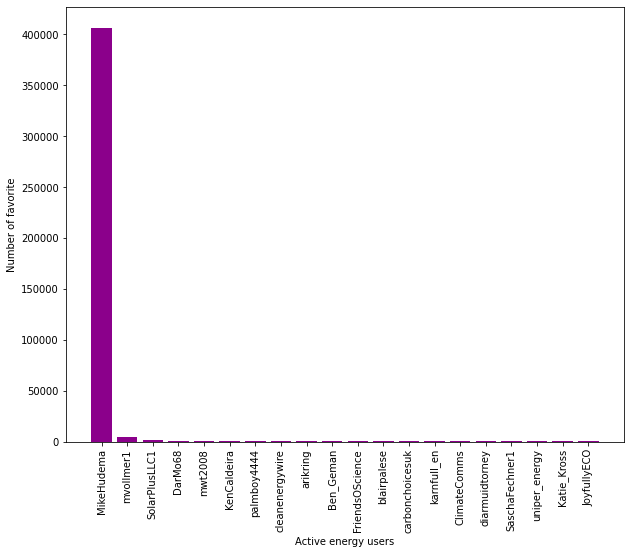

In [ ]:
# Barplot of users with the most favorites
graph1 = favorite_users.head(20)

plt.figure(figsize=(10,8))
_=plt.bar(graph1.index,graph1.favorite_count, color='darkmagenta')
plt.xlabel('Active energy users')
plt.ylabel('Number of favorite')
_=plt.xticks(graph1.index, rotation=90)

## Users with the highest retweets count

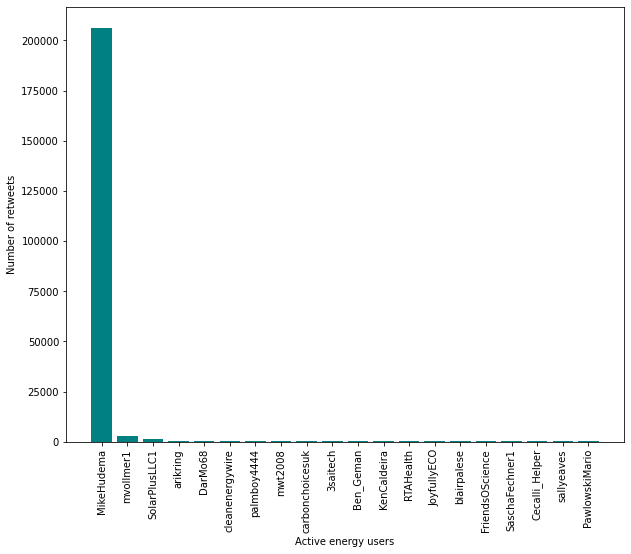

In [ ]:
# Barplot of users with the most retweets
retweeted_users = groupusers.sort_values('retweet_count', ascending=False)

graph2 = retweeted_users.head(20)

plt.figure(figsize=(10,8))
_=plt.bar(graph2.index,graph2.retweet_count, color='teal')
plt.xlabel('Active energy users')
plt.ylabel('Number of retweets')
_=plt.xticks(graph2.index, rotation=90)

We notice from the barplot that Mike Hudema has the most highest retweets and favourites from the two barplot. Therefore, we analyse further on other users excluding the outlier.

## Users with the highest favourites count without the 'outlier'

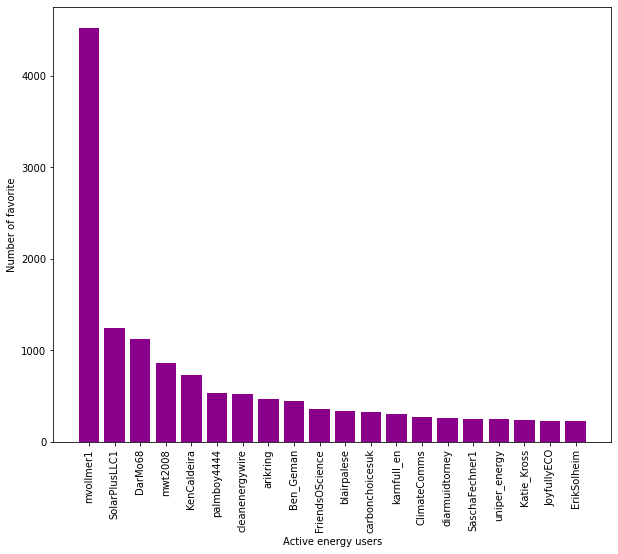

In [ ]:
# Barplot of users with the most favourites after removing Mike Hudema
graph1_1 = favorite_users.drop('MikeHudema').head(20)

plt.figure(figsize=(10,8))
_=plt.bar(graph1_1.index,graph1_1.favorite_count, color='darkmagenta')
plt.xlabel('Active energy users')
plt.ylabel('Number of favorite')
_=plt.xticks(graph1_1.index, rotation=90)

## Users with the highest retweets count without the 'outlier'

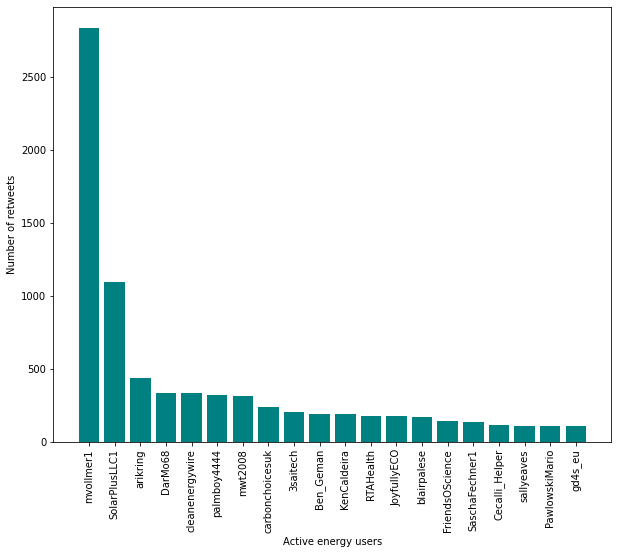

In [ ]:
# Barplot of users with the most retweets after removing Mike Hudema
graph2_1 = retweeted_users.drop('MikeHudema').head(20)
plt.figure(figsize=(10,8))
_=plt.bar(graph2_1.index,graph2_1.retweet_count, color='teal')
plt.xlabel('Active energy users')
plt.ylabel('Number of retweets')
_=plt.xticks(graph2_1.index, rotation=90)

## Users with the highest quotes count without the 'outlier'

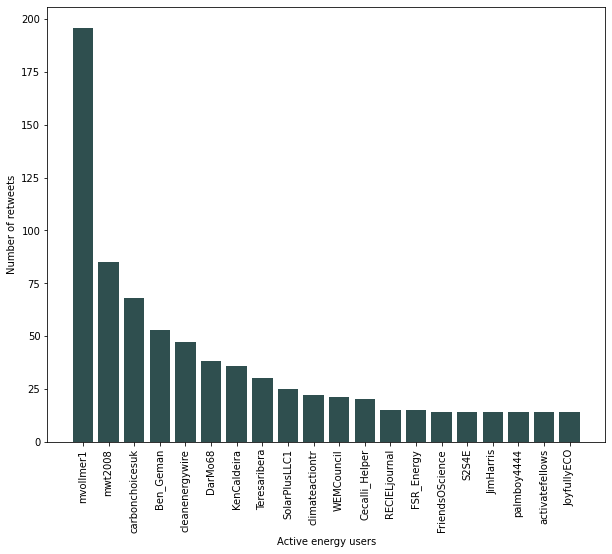

In [ ]:
# Barplot of users with the most quotes / removing Mike Hudema
quoted_users = groupusers.sort_values('quoteCount', ascending=False)

graph4 = quoted_users.drop('MikeHudema').head(20)
plt.figure(figsize=(10,8))
_=plt.bar(graph4.index,graph4.quoteCount, color='darkslategrey')
plt.xlabel('Active energy users')
plt.ylabel('Number of retweets')
_=plt.xticks(graph4.index, rotation=90)

## Users with the highest replies count without the 'outlier'

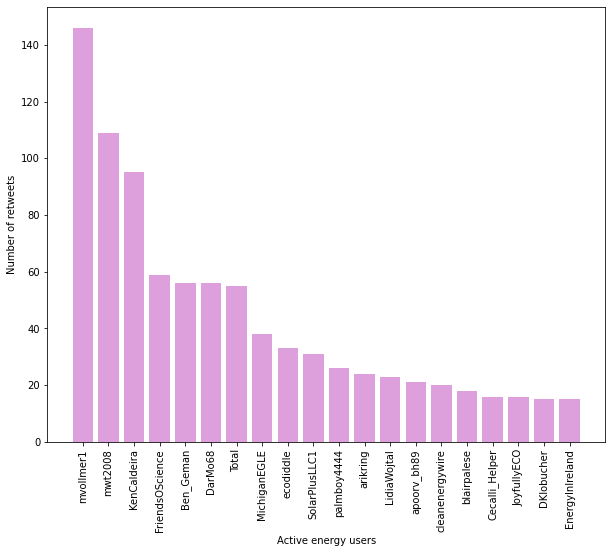

In [ ]:
# Barplot of users with the most replies / removing Mike Hudema
reply_users = groupusers.sort_values('reply_count', ascending=False)

graph3 = reply_users.drop('MikeHudema').head(20)
plt.figure(figsize=(10,8))
_=plt.bar(graph3.index,graph3.reply_count, color='plum')
plt.xlabel('Active energy users')
plt.ylabel('Number of retweets')
_=plt.xticks(graph3.index, rotation=90)

### Correlation Analysis between the 'Tweet interactions' variables

In [ ]:
corr = users_energy.corr()
corr

,reply_count,retweet_count,favorite_count,quoteCount
reply_count,1.000000,0.876713,0.881713,0.844728
retweet_count,0.876713,1.000000,0.974449,0.863803
favorite_count,0.881713,0.974449,1.000000,0.866391
quoteCount,0.844728,0.863803,0.866391,1.000000


# Calculating Ratio of Hashtag engagement
According to Twitter, retweets and replies are the highest indicators for user engagement 

# 1st way

In [ ]:
groupusers = groupusers.replace(0, np.nan)
groupusers = groupusers.dropna(how='all', axis=0)
groupusers = groupusers.replace(np.nan, 0)

Since Twittter calculates the ration of engagement by **(retweets+replies count / N of followers)*100** 
>we retrieve manually N of followers from twitter of the top 10 users 

In [ ]:
groupusers['engagement'] = ((groupusers.reply_count*3) + (groupusers.retweet_count*3) +
 (groupusers.favorite_count) + (groupusers.quoteCount))/8 

In [ ]:
groupusers.engagement.describe()

count      2788.000000
mean         53.214805
std        2547.776720
min           0.125000
25%           0.375000
50%           1.000000
75%           2.875000
max      134517.250000
Name: engagement, dtype: float64

we normalise the scale of ratio since we have  **min 0.125000 and max 134517.250000**



In [ ]:
groupusers['engagement'] = round((abs((groupusers.engagement-groupusers.engagement.mean()))/ groupusers.engagement.std()*100),2)

## Visualisation of engagement of top Active users

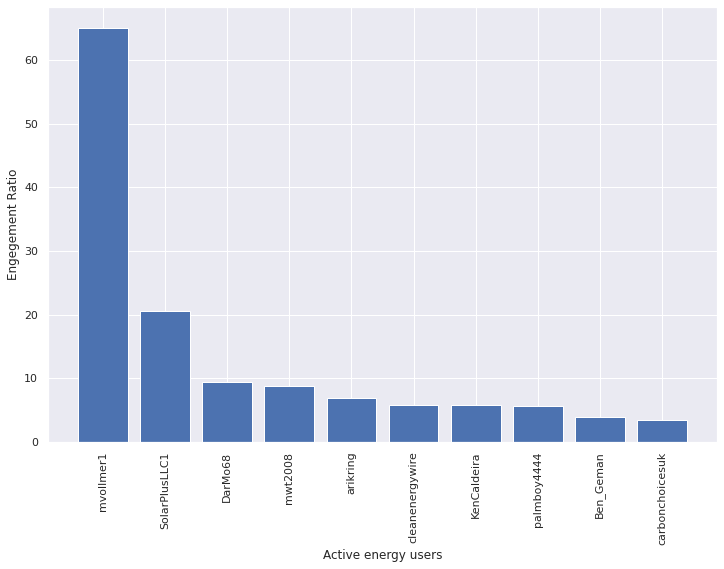

In [ ]:
graph_en = groupusers.sort_values(by='engagement', ascending=False)
graph_en = graph_eng.head(10)

plt.figure(figsize=(12,8))
_=plt.bar(graph_eng.index,graph_eng.engagement, color='b')
plt.xlabel('Active energy users')
plt.ylabel('Engegement Ratio')
_=plt.xticks(rotation=90)

## Visualisation of engagement of top Active users without the 'outlier'

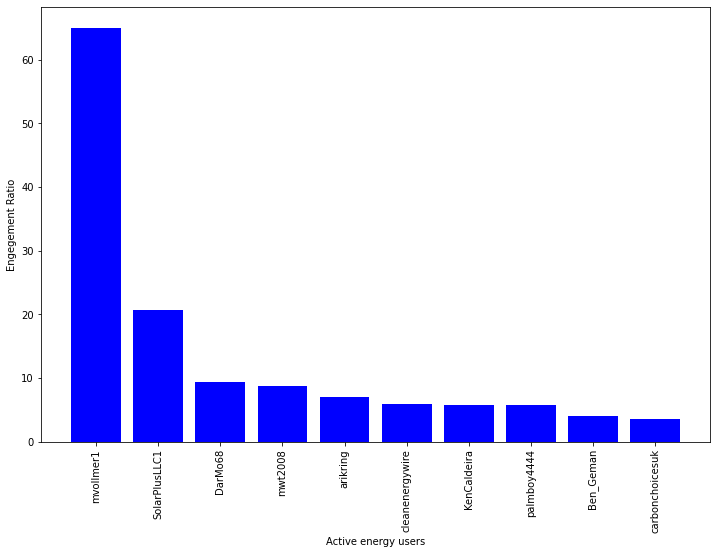

In [ ]:
graph_eng = groupusers.drop('MikeHudema').sort_values(by='engagement', ascending=False)
graph_eng = graph_eng.head(10)

plt.figure(figsize=(12,8))
_=plt.bar(graph_eng.index,graph_eng.engagement, color='b')
plt.xlabel('Active energy users')
plt.ylabel('Engegement Ratio')
_=plt.xticks(rotation=90)

we try to normalise data to see if there is a difference 

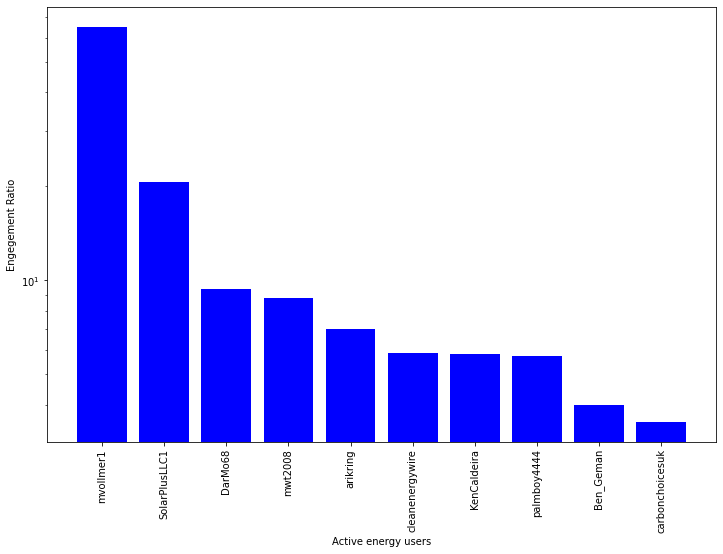

In [ ]:
plt.figure(figsize=(12,8))
_=plt.bar(graph_eng.index,graph_eng.engagement, color='b')
plt.xlabel('Active energy users')
plt.ylabel('Engegement Ratio')
plt.yscale('log')
_=plt.xticks(rotation=90)

# 2nd Way

In [ ]:
topusers = groupusers.sort_values(by= ['retweet_count','reply_count'], ascending=False).head(11)
topusers

,reply_count,retweet_count,favorite_count,quoteCount,engagement
user_screen_name,,,,,
MikeHudema,11429.0,206473.0,406828.0,15604.0,5277.70
mvollmer1,146.0,2840.0,4530.0,196.0,65.05
SolarPlusLLC1,31.0,1093.0,1240.0,25.0,20.66
arikring,24.0,434.0,463.0,13.0,6.99
DarMo68,56.0,336.0,1121.0,38.0,9.37
cleanenergywire,20.0,332.0,519.0,47.0,5.87
palmboy4444,26.0,321.0,537.0,14.0,5.72
mwt2008,109.0,313.0,858.0,85.0,8.75
carbonchoicesuk,11.0,240.0,323.0,68.0,3.52


- we create file for the top users' followers

In [22]:
top10 = pd.read_csv('top10users.txt')
top10

,user_screen_name,n_followers
0,mvollmer1,67019
1,SolarPlusLLC1,781
2,arikring,87065
3,mwt2008,5677
4,DarMo68,508
5,cleanenergywire,9865
6,palmboy4444,1132
7,KenCaldeira,24884
8,carbonchoicesuk,2127
9,Ben_Geman,16796


In [ ]:
topusers = topusers.merge(top10, how='left', on=['user_screen_name'])
topusers

,user_screen_name,reply_count,retweet_count,favorite_count,quoteCount,engagement,n_followers
0,MikeHudema,11429.0,206473.0,406828.0,15604.0,5277.70,131600
1,mvollmer1,146.0,2840.0,4530.0,196.0,65.05,67019
2,SolarPlusLLC1,31.0,1093.0,1240.0,25.0,20.66,781
3,arikring,24.0,434.0,463.0,13.0,6.99,87065
4,DarMo68,56.0,336.0,1121.0,38.0,9.37,508
5,cleanenergywire,20.0,332.0,519.0,47.0,5.87,9865
6,palmboy4444,26.0,321.0,537.0,14.0,5.72,1132
7,mwt2008,109.0,313.0,858.0,85.0,8.75,5677
8,carbonchoicesuk,11.0,240.0,323.0,68.0,3.52,2127
9,carbonchoicesuk,11.0,240.0,323.0,68.0,3.52,2127


According to Twitter formula of calculationg engagement

In [ ]:
topusers['engagement'] = 
(topusers.reply_count + topusers.retweet_count) / topusers.n_followers 

## Engagement Ration of most influencial users

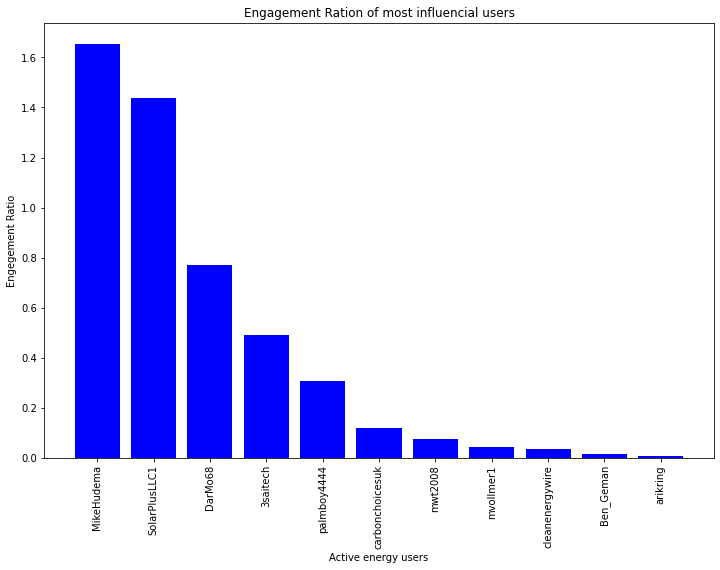

In [ ]:
topusers = topusers.sort_values(by='engagement', ascending=False)

plt.figure(figsize=(12,8))
plt.title('Engagement Ration of most influencial users')
_=plt.bar(topusers.user_screen_name,topusers.engagement, color='b')
plt.xlabel('Active energy users')
plt.ylabel('Engegement Ratio')
_=plt.xticks(rotation=90)

to get a clear picture we take out the two top outliers to analyse better the other users.

In [ ]:
top_users_wo_outliers = topusers.loc[(topusers["user_screen_name"] != 'MikeHudema') & (topusers["user_screen_name"] != 'mvollmer1')]
top_users_wo_outliers = top_users_wo_outliers.sort_values(by='engagement', ascending=False)

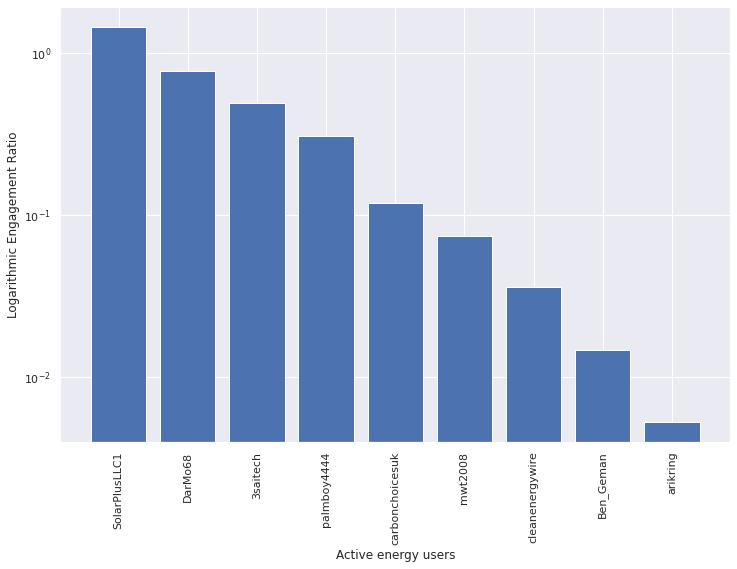

In [ ]:
plt.figure(figsize=(12,8))

_=plt.bar(top_users_wo_outliers.user_screen_name,top_users_wo_outliers.engagement, color='b')
plt.xlabel('Active energy users')
plt.ylabel('Logarithmic Engagement Ratio')
plt.yscale('log')
_=plt.xticks(rotation=90)

# Used devices

In [ ]:
plateformes_used = twitter_dataset.source_name.value_counts().head(10)
plateformes_used.count

<bound method Series.count of Twitter Web App        111472
Twitter for iPhone      38134
Twitter for Android     23622
Hootsuite Inc.          20095
TweetDeck               15350
IFTTT                    9278
Twitter Web Client       9187
Twitter for iPad         8426
Buffer                   7865
eClincher                3757
Name: source_name, dtype: int64>

In [ ]:
tweet_sources = twitter_dataset[twitter_dataset.source_name.isin(plateformes_used.index)]
tweet_sources.head()

,index,created_at,text,user_screen_name,reply_count,retweet_count,favorite_count,quoteCount,source_name,hashtags,tokenized_text,energy,date
0,0,2020-01-31 23:57:47+00:00,#Canberra suburbs and hundreds of lives at ris...,LeipzigSyd,2.0,5.0,6.0,0.0,Twitter for Android,canberra|bushfires|nsw|act|victoria|coal|gas|a...,"[canberra, bushfires, nsw, act, victoria, coal...",0,2020-01-31
1,1,2020-01-31 23:55:45+00:00,Another consequence of climate change: Dozens ...,5minofscience,0.0,1.0,0.0,0.0,Twitter for Android,climatechange|climate|environment|coronoraviru...,"[climatechange, climate, environment, coronora...",0,2020-01-31
2,2,2020-01-31 23:49:44+00:00,#Climate breakdown 'is increasing #ViolenceAga...,Cameron_Diver,0.0,2.0,10.0,0.0,Twitter for iPhone,climate|violenceagainstwomen|vawg|climatechang...,"[climate, violenceagainstwomen, vawg, climatec...",0,2020-01-31
3,3,2020-01-31 23:48:01+00:00,'If a private plane is really the most cost-ef...,PlantBasedNews,2.0,5.0,22.0,1.0,Buffer,climate,[climate],0,2020-01-31
4,4,2020-01-31 23:35:35+00:00,@TerrySquibb1 @marketmodel @jimcramer @Sameera...,Bec_Carman,3.0,0.0,0.0,0.0,Twitter Web App,fossilfuels|climate,"[fossilfuels, climate]",0,2020-01-31


## Analysing  hashtag engagement throughout the period of 2020

In [ ]:
tweet_sources['hour'] = pd.to_datetime(tweet_sources['created_at'],format='%Y-%m-%dT%H:%M:%S.%f').dt.hour

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


to transform from this '2020-01-31 23:49:44+00:00' to get the hour/month for further anaysis

In [ ]:
tweet_sources['hour']

0         23
1         23
2         23
3         23
4         23
          ..
288344     0
288345     0
288346     0
288347     0
288348     0
Name: hour, Length: 247186, dtype: int64

In [ ]:
twitter_dataset['date'] = pd.to_datetime(twitter_dataset['created_at'],format='%Y-%m-%dT%H:%M:%S.%f').dt.date

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
retweets_mike = twitter_dataset[twitter_dataset.text.str.contains('MikeHudema', regex=False) & twitter_dataset.energy == 1]

In [ ]:
tweets_mike = twitter_dataset[(twitter_dataset["user_screen_name"]== 'MikeHudema') & (twitter_dataset["energy"] == 1)]

In [ ]:
tweets_mike.head()

,index,created_at,text,user_screen_name,reply_count,retweet_count,favorite_count,quoteCount,source_name,hashtags,tokenized_text,energy,date
532,532,2020-01-31 12:34:27+00:00,"""Right here, right now is where we draw the li...",MikeHudema,17.0,183.0,519.0,12.0,Buffer,actonclimate|greennewdeal|climate|energy|clima...,"[actonclimate, greennewdeal, climate, energy, ...",1,2020-01-31
1886,1886,2020-01-30 05:22:18+00:00,They pay for our inaction. \n\nTime to #ActOnC...,MikeHudema,2.0,105.0,266.0,5.0,Buffer,actonclimate|climate|energy|australiafires|cli...,"[actonclimate, climate, energy, australiafires...",1,2020-01-30
2093,2093,2020-01-29 22:18:25+00:00,Ikea put 1 million #solarpanels on their store...,MikeHudema,42.0,848.0,2183.0,53.0,Buffer,solarpanels|solar|actonclimate|climate|energy|...,"[solarpanels, solar, actonclimate, climate, en...",1,2020-01-29
3069,3069,2020-01-29 01:32:23+00:00,New Zealand banned all new oil and gas develop...,MikeHudema,21.0,643.0,1525.0,43.0,Buffer,climatecrisis|actonclimate|climate|energy|go10...,"[climatecrisis, actonclimate, climate, energy,...",1,2020-01-29
4933,4933,2020-01-27 12:22:29+00:00,We need to do better. \n\nThere is no planet B...,MikeHudema,36.0,673.0,1033.0,50.0,Buffer,actonclimate|climate|energy|deforestation,"[actonclimate, climate, energy, deforestation]",1,2020-01-27


In [ ]:
graph_retweet = retweets_mike.groupby('date').sum()

## Retweet number concerning posts of the most influencial user of #energy hashtag

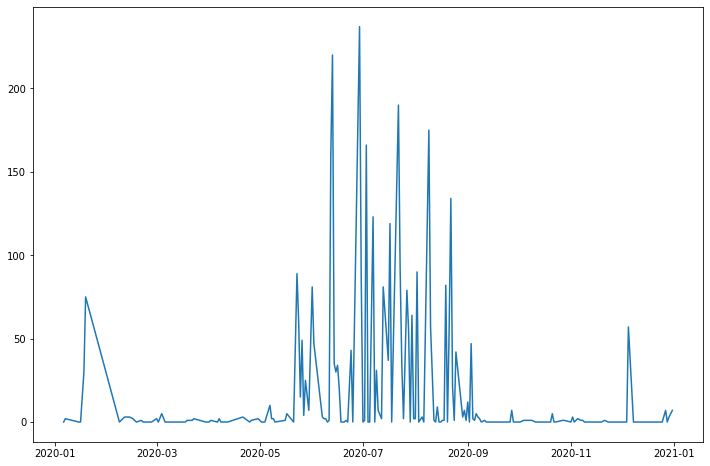

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(graph_retweet.index,graph_retweet.retweet_count)

In [ ]:
#add new graph for tweets

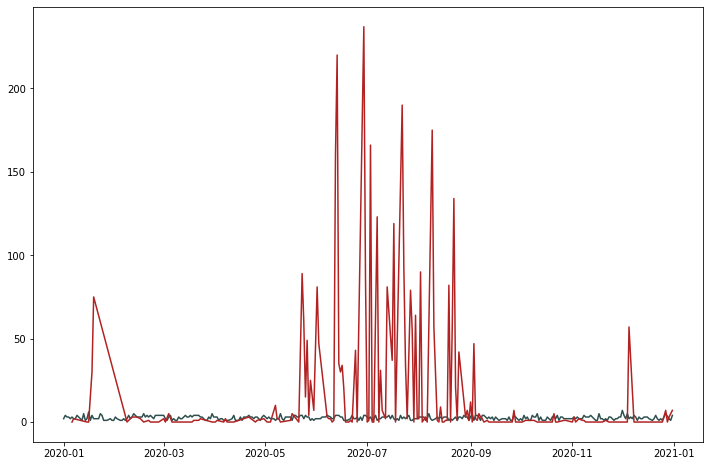

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(graph_tweet.insns.relplot(x= tweets_mike.index, y= n', data=covid,kind='line',
            hue = 'continent', ci=None, height=4, aspect=3).set(title = '')dex,graph_tweet.text, color='darkslategrey')

plt.plot(graph_retweet.index,graph_retweet.retweet_count, color='firebrick')

plt.show()

In [ ]:
t_users = twitter_dataset[(twitter_dataset.user_screen_name.isin(topusers.user_screen_name.values)) & (t_users["energy"] == 1)]
t_users.set_index('date').sum()

index                                                        32951347
created_at          2020-01-31 21:31:16+00:002020-01-31 19:29:53+0...
text                Want to make sure you never miss a thing from ...
user_screen_name    SolarPlusLLC1SolarPlusLLC1MikeHudemaDarMo68Mik...
reply_count                                                     11909
retweet_count                                                  212777
favorite_count                                                 416967
quoteCount                                                      16143
source_name         Twitter Web AppTwitter Web AppBufferTwitter We...
hashtags            nabcep|climate|green|solar|energy|solarpower|r...
tokenized_text      [nabcep, climate, green, solar, energy, solarp...
energy                                                           2728
dtype: object

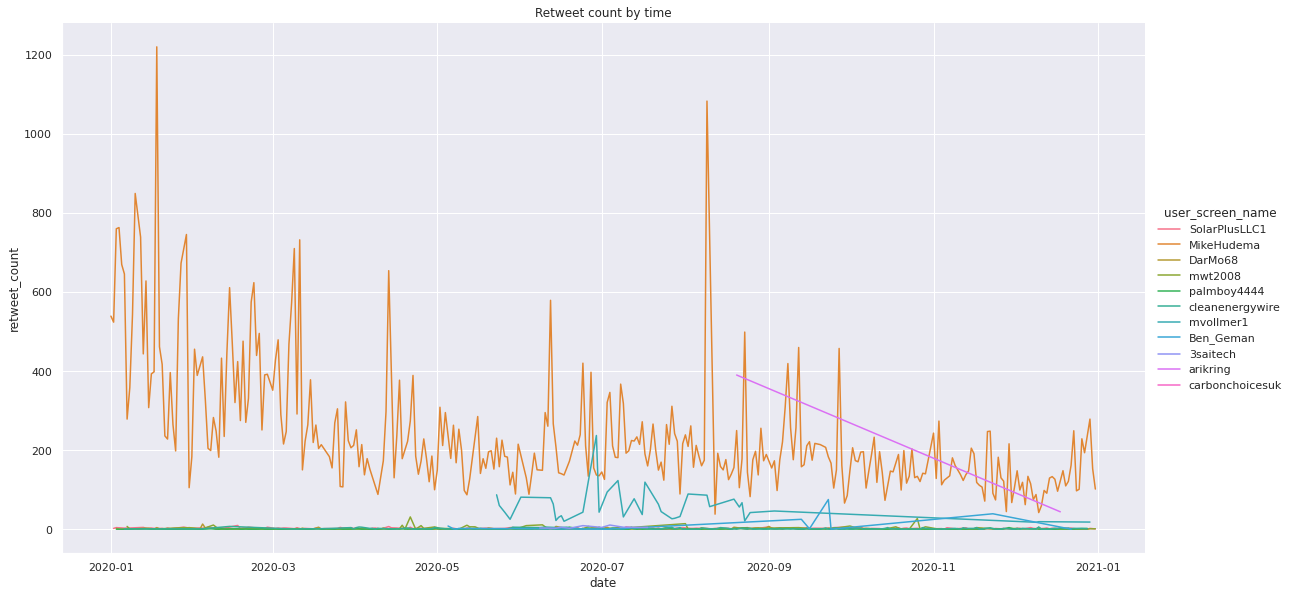

In [ ]:
sns.relplot(x= 'date', y= 'retweet_count', data=t_users,kind='line',
            hue = 'user_screen_name', ci=None, height=8, aspect=2).set(title = 'Retweet count by time')


In [ ]:
user = twitter_dataset[(twitter_dataset.user_screen_name.isin(topusers.user_screen_name.values)) & (twitter_dataset["energy"] == 1) & 
(twitter_dataset["user_screen_name"]== 'arikring')]
user.groupby('date').sum()

,index,reply_count,retweet_count,favorite_count,quoteCount,energy
date,,,,,,
2020-08-20,7124,17.0,390.0,428.0,12.0,1
2020-12-18,7070,7.0,44.0,35.0,1.0,1


we take out the users that have the highest retweet count in order to analyse other's users trend throughtout the time

In [ ]:
t_users_wo_outliers = twitter_dataset[(twitter_dataset.user_screen_name.isin(topusers.user_screen_name.values)) & (t_users["energy"] == 1) &
 (t_users["user_screen_name"]!= 'MikeHudema')& (t_users["energy"] == 1) & (t_users["user_screen_name"]!= 'mvollmer1') & (t_users["user_screen_name"]!= 'arikring')
 & (t_users["user_screen_name"]!= 'Ben_Geman')]
t_users_wo_outliers.set_index('date').sum()

index                                                        21881391
created_at          2020-01-31 21:31:16+00:002020-01-31 19:29:53+0...
text                Want to make sure you never miss a thing from ...
user_screen_name    SolarPlusLLC1SolarPlusLLC1DarMo68SolarPlusLLC1...
reply_count                                                       254
retweet_count                                                    2840
favorite_count                                                   4699
quoteCount                                                        277
source_name         Twitter Web AppTwitter Web AppTwitter Web AppT...
hashtags            nabcep|climate|green|solar|energy|solarpower|r...
tokenized_text      [nabcep, climate, green, solar, energy, solarp...
energy                                                           1809
dtype: object

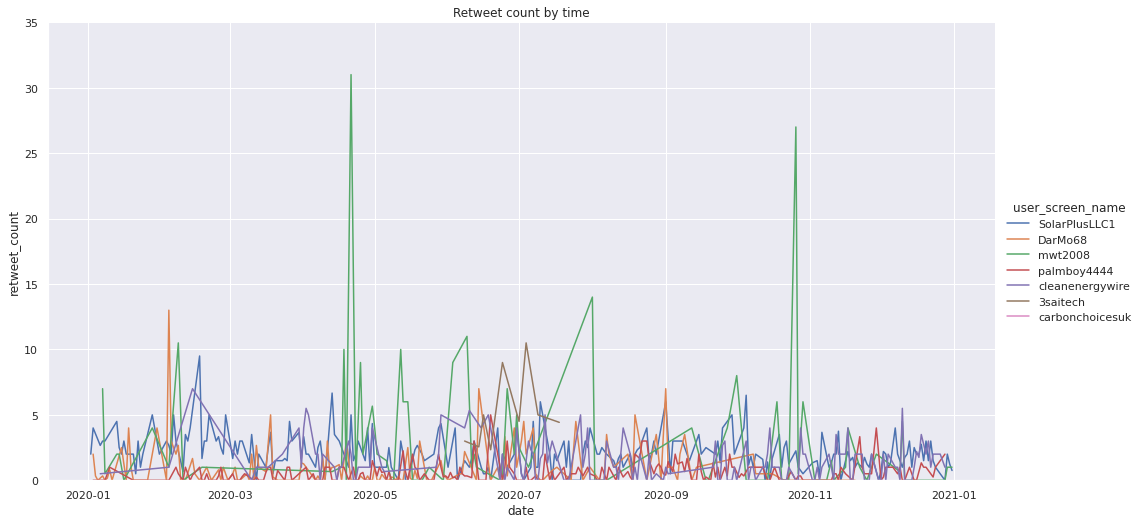

In [ ]:
x = sns.relplot(x= 'date', y= 'retweet_count', data=t_users_wo_outliers,kind='line',
            hue = 'user_screen_name',ci=None, height=7, aspect=2).set(title = 'Retweet count by time')
#sns.axisgrid.FacetGrid
x.set(ylim=(0, 35))


In [ ]:
twitter_dataset[twitter_dataset.user_screen_name.isin(['arikring']) & ]

,index,created_at,text,user_screen_name,reply_count,retweet_count,favorite_count,quoteCount,source_name,hashtags,tokenized_text,energy,date
13238,13238,2020-01-19 23:05:52+00:00,@HansLak @TXsharon @RisePDX @Jackthelad1947 @s...,arikring,10.0,185.0,184.0,4.0,Twitter Web App,coal|us|energytransition|solar|wind|geothermal...,"[coal, us, energytransition, solar, wind, geot...",0,2020-01-19
54474,23220,2020-02-06 22:31:08+00:00,@Zalmodegicos @RuthPtn @DawnRoseTurner @ToddMc...,arikring,85.0,736.0,493.0,33.0,Twitter for Android,co2|actonclimate|fridaysforfuture|climatestrik...,"[co2, actonclimate, fridaysforfuture, climates...",0,2020-02-06
62393,2186,2020-03-27 22:05:59+00:00,@GeraldKutney @CailinasEirinn @seth_leitman @C...,arikring,5.0,140.0,90.0,6.0,Twitter Web App,methane|climate|climatechange|ghg|climatestrik...,"[methane, climate, climatechange, ghg, climate...",0,2020-03-27
84938,3612,2020-04-25 22:51:38+00:00,@climateguyw @Hazloe3 @ProfStrachan @ECOWARRIO...,arikring,7.0,259.0,225.0,9.0,Twitter Web App,climateaction|climate|fridaysforfuture|climate...,"[climateaction, climate, fridaysforfuture, cli...",0,2020-04-25
156184,15951,2020-07-09 21:07:21+00:00,@Jackthelad1947 @ristori20 @kashthefuturist @A...,arikring,22.0,652.0,388.0,40.0,Twitter for Android,arctic|climatecrisis|climateaction|climate|car...,"[arctic, climatecrisis, climateaction, climate...",0,2020-07-09
169392,7124,2020-08-20 20:00:23+00:00,@Hazloe3 @ProfStrachan @ECOWARRIORSS @MsFowler...,arikring,17.0,390.0,428.0,12.0,Twitter Web App,climatecrisis|climateaction|fridaysforfuture|c...,"[climatecrisis, climateaction, fridaysforfutur...",1,2020-08-20
206357,24708,2020-09-05 22:01:55+00:00,@Jackthelad1947 @ristori20 @kashthefuturist @A...,arikring,9.0,454.0,461.0,21.0,Twitter Web App,estonian|volunteers|climatecrisis|climateactio...,"[estonian, volunteers, climatecrisis, climatea...",0,2020-09-05
271008,7070,2020-12-18 20:37:27+00:00,@RisePDX @mzjacobson @Jackthelad1947 @HansLak ...,arikring,7.0,44.0,35.0,1.0,Twitter Web App,emobility|ev|climateaction|fridaysforfuture|ca...,"[emobility, ev, climateaction, fridaysforfutur...",1,2020-12-18
